In [ ]:
import os
import pandas as pd
import numpy as np
from datetime import datetime

import matplotlib.pyplot as plt
from importlib import reload

import Tree
reload(Tree)
from Tree import *

import forecast_prophet
reload(forecast_prophet)
from forecast_prophet import *

import forecast_arima
reload(forecast_arima)
from forecast_arima import *

import utils
reload(utils)
from utils import *

import main
reload(main)
from main import *

path='c:\\Users\\31683\\Desktop\\data\\M5'
Y_path=path+f"\\sales_train_validation.pkl"  # to data file 
Y_path_eval=path+f"\\sales_train_evaluation.pkl" 
X_path_val_eval=path+f"\\prices_train_val_eval.pkl"  # to data file
dfHolidays=pd.read_csv(path+f"\\holidays.csv")

data=pd.read_pickle(Y_path)
iOoS=28
lMethods=["bottom_up", 
                #  "top_down_ph" ,"top_down_hp",
                  "ols", "wls" ,'mint_sample','mint_shrink','mint_diag']

# mX  = get_mX(X_path_val_eval)

# Perform CV using tuned params

In [ ]:

initial=1548
period=7
horizon=28   

tree_cv_tuned=Tree( data= data , type='spatial') 
with open(os.getcwd()+'\\outputs\\ddParams_20241007_232407.pkl', 'rb') as file:
    ddParams  = pickle.load(file) 
tree_cv_tuned.ddParams=ddParams
dOutputs  = tree_cv_tuned.cross_validation(dfHolidays,initial, period, horizon , lMethods)

with open(os.getcwd()+f"\\outputs\\dCVOutputs_tuned.pkl", "wb") as myFile:
    pickle.dump(dOutputs, myFile)
    
    
slices = [len([sublist for sublist in tree_cv_tuned.list_of_leafs if sublist.count(None) == i]) for i, _ in enumerate(tree_cv_tuned.levels)]
slices.append(1)

c:\Users\31683\Desktop\Hierarchical-Forecasting\Tree.py:121: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[level]=None


Number of iterations is 49
Reconciliation is complete
Reconciliation is complete
Reconciliation is complete
Reconciliation is complete
Reconciliation is complete
Reconciliation is complete
CV iterations completed = 1 of 49
Reconciliation is complete
Reconciliation is complete
Reconciliation is complete
Reconciliation is complete
Reconciliation is complete
Reconciliation is complete
CV iterations completed = 2 of 49
Reconciliation is complete
Reconciliation is complete
Reconciliation is complete
Reconciliation is complete
Reconciliation is complete
Reconciliation is complete
CV iterations completed = 3 of 49
Reconciliation is complete
Reconciliation is complete
Reconciliation is complete
Reconciliation is complete
Reconciliation is complete
Reconciliation is complete
CV iterations completed = 4 of 49
Reconciliation is complete
Reconciliation is complete
Reconciliation is complete
Reconciliation is complete
Reconciliation is complete
Reconciliation is complete
CV iterations completed = 5

Optimization terminated abnormally. Falling back to Newton.


Reconciliation is complete
Reconciliation is complete
Reconciliation is complete
Reconciliation is complete
Reconciliation is complete
Reconciliation is complete
CV iterations completed = 28 of 49
Reconciliation is complete
Reconciliation is complete
Reconciliation is complete
Reconciliation is complete
Reconciliation is complete
Reconciliation is complete
CV iterations completed = 29 of 49
Reconciliation is complete
Reconciliation is complete
Reconciliation is complete
Reconciliation is complete
Reconciliation is complete
Reconciliation is complete
CV iterations completed = 30 of 49
Reconciliation is complete
Reconciliation is complete
Reconciliation is complete
Reconciliation is complete
Reconciliation is complete
Reconciliation is complete
CV iterations completed = 31 of 49
Reconciliation is complete
Reconciliation is complete
Reconciliation is complete
Reconciliation is complete
Reconciliation is complete
Reconciliation is complete
CV iterations completed = 32 of 49
Reconciliation 

# Tune and Perform CV , save CV outputs

In [ ]:

initial=1548
period=28
horizon=28   

tree_tuned=Tree( data= data , type='spatial') 
tree_tuned.tune_Prophet(random_size=101,initial=int(initial*0.7), period=period, horizon=horizon)
# output ddParams_timestamp.pkl to data folder 
dOutputs  = tree_tuned.cross_validation(dfHolidays,initial, period, horizon)

with open(os.getcwd()+f"\\outputs\\dCVOutputs_tuned.pkl", "wb") as myFile:
    pickle.dump(dOutputs, myFile)

# Forecast Tree using tuned parameters

In [ ]:
with open(os.getcwd()+'\\outputs\\ddParams_20241007_232407.pkl', 'rb') as file:
    ddParams  = pickle.load(file) 
    
tree_tuned=Tree( data= data , type='spatial') 
tree_tuned.forecast_Prophet(iOoS=28 , dfHolidays=dfHolidays, ddParams=ddParams)

slices = [len([sublist for sublist in tree_tuned.list_of_leafs if sublist.count(None) == i]) for i, _ in enumerate(tree_tuned.levels)]
slices.append(1)
 

c:\Users\31683\Desktop\Hierarchical-Forecasting\Tree.py:121: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[level]=None


# Perform CV using default params

In [ ]:

initial=1548
period=7
horizon=28   

tree_default=Tree( data= data , type='spatial') 
dOutputs  = tree_default.cross_validation(dfHolidays,initial, period, horizon, lMethods)

with open(os.getcwd()+f"\\outputs\\dCVOutputs_default.pkl", "wb") as myFile:
    pickle.dump(dOutputs, myFile)
    
slices = [len([sublist for sublist in tree_default.list_of_leafs if sublist.count(None) == i]) for i, _ in enumerate(tree_default.levels)]
slices.append(1)

c:\Users\31683\Desktop\Hierarchical-Forecasting\Tree.py:121: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[level]=None


Number of iterations is 49
Reconciliation is complete
Reconciliation is complete
Reconciliation is complete
Reconciliation is complete
Reconciliation is complete
Reconciliation is complete
CV iterations completed = 1 of 49
Reconciliation is complete
Reconciliation is complete
Reconciliation is complete
Reconciliation is complete
Reconciliation is complete
Reconciliation is complete
CV iterations completed = 2 of 49
Reconciliation is complete
Reconciliation is complete
Reconciliation is complete
Reconciliation is complete
Reconciliation is complete
Reconciliation is complete
CV iterations completed = 3 of 49
Reconciliation is complete
Reconciliation is complete
Reconciliation is complete
Reconciliation is complete
Reconciliation is complete
Reconciliation is complete
CV iterations completed = 4 of 49
Reconciliation is complete
Reconciliation is complete
Reconciliation is complete
Reconciliation is complete
Reconciliation is complete
Reconciliation is complete
CV iterations completed = 5

# Forecast Tree using default parameters

In [ ]:

tree_default=Tree( data= data , type='spatial') 
tree_default.forecast_Prophet(iOoS=28 , dfHolidays=dfHolidays, ddParams=None)

slices = [len([sublist for sublist in tree_default.list_of_leafs if sublist.count(None) == i]) for i, _ in enumerate(tree_default.levels)]
slices.append(1)

c:\Users\31683\Desktop\Hierarchical-Forecasting\Tree.py:122: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[level]=None


# Forecast Tree using Tuned parameters

In [ ]:
with open(os.getcwd()+'\\outputs\\ddParams_20241007_232407.pkl', 'rb') as file:
    ddParams  = pickle.load(file)   
tree_tuned=Tree( data= data , type='spatial') 
tree_tuned.forecast_Prophet(iOoS=28 , dfHolidays=dfHolidays, ddParams=ddParams)

slices = [len([sublist for sublist in tree_tuned.list_of_leafs if sublist.count(None) == i]) for i, _ in enumerate(tree_tuned.levels)]
slices.append(1)

c:\Users\31683\Desktop\M5-1\Tree.py:122: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[level]=None


# read dOutputs of already completed CVs

In [ ]:
with open(os.getcwd()+'\\outputs\\dCVOutputs_default.pkl', 'rb') as file:
    dOutputs_default  = pickle.load(file) 
with open(os.getcwd()+'\\outputs\\dCVOutputs_tuned.pkl', 'rb') as file:
    dOutputs_tuned  = pickle.load(file) 
tree_default=Tree( data= data , type='spatial')  
slices = [len([sublist for sublist in tree_default.list_of_leafs if sublist.count(None) == i]) for i, _ in enumerate(tree_default.levels)]
slices.append(1)

    

c:\Users\31683\Desktop\Hierarchical-Forecasting\Tree.py:122: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df=df.drop_duplicates()


# Plots and Tables

In [ ]:
tree_=Tree( data= data , type='spatial') 
slices = [len([sublist for sublist in tree_.list_of_leafs if sublist.count(None) == i]) for i, _ in enumerate(tree_.levels)]
slices.append(1)

c:\Users\31683\Desktop\M5-1\Tree.py:122: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[level]=None


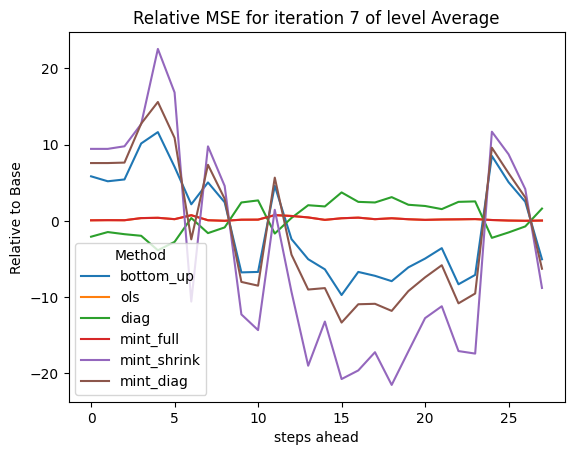

In [ ]:
dOutputs=dOutputs_default

iter=7
relative='Base'
level='Average'
iters=int(dOutputs_default['bottom_up']['mYhat'].shape[1]/28)
metric='MSE'

lMethods=list(dOutputs.keys())
# lMethods.remove('top_down_ph')
# lMethods.remove('top_down_hp')

plt.figure()
for method in lMethods:
    vValues = np.zeros(28)
    
    for h in range(1, 29):
        df = getCVResults(h=h, dOutputs=dOutputs_default,  metric=metric, slices=slices, 
                          iters=iter, 
                          rolling=False)[method]
        vValues[h-1] = df[df.index == level][relative].item()    
    plt.plot(np.arange(28), vValues, label=method)

plt.legend(title="Method")
plt.xlabel("steps ahead")
plt.ylabel(f"Relative to {relative}")
plt.title(f"Relative {metric} for iteration {iter} of level {level}")

# Show the plot
plt.show()


## Plot of iterations per h


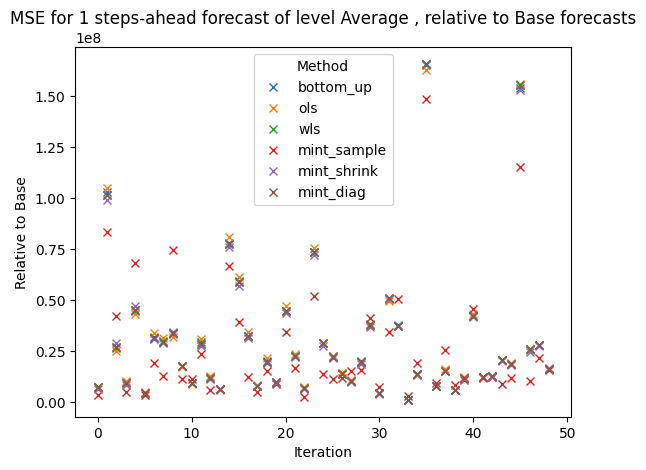

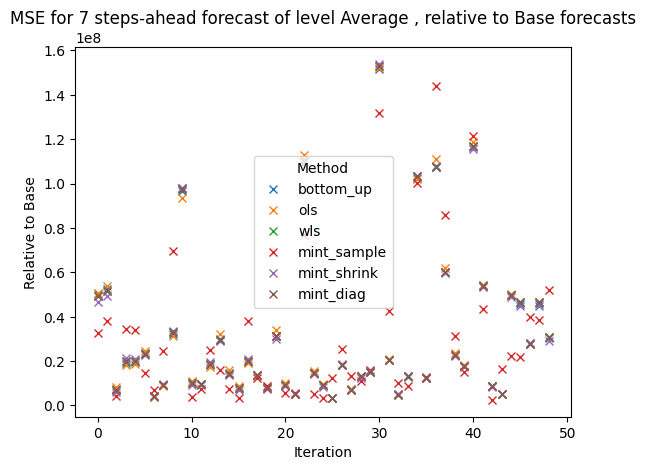

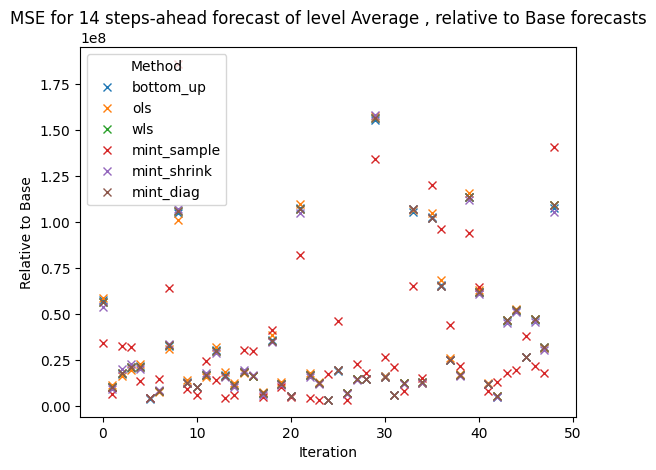

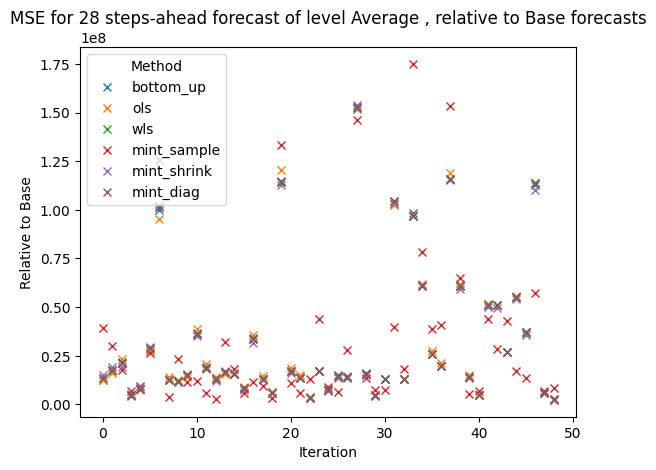

In [41]:
dOutputs=dOutputs_default
relative='Base'
level='Average'
iters=int(dOutputs['bottom_up']['mYhat'].shape[1]/28)
metric='MSE'

lMethods=list(dOutputs.keys())
# lMethods.remove('top_down_ph')
# lMethods.remove('top_down_hp')

plt.figure()
for h in [1,7,14,28]:
    for method in lMethods:
        vValues = np.zeros(iters)
        
        for iter in range(1, iters+1):
            df = getCVResults(h=h, dOutputs=dOutputs, metric=metric, 
                            slices=slices, 
                            iters=iter, 
                            rolling=False,
                            relative=False)[method]
            vValues[iter-1] = df[df.index == level].item()    
        plt.plot(np.arange(iters), vValues,'x' ,label=method)

    plt.legend(title="Method")
    plt.xlabel("Iteration")
    plt.ylabel(f"Relative to {relative}")
    plt.title(f"{metric} for {h} steps-ahead forecast of level {level} , relative to {relative} forecasts")

    # Show the plot
    plt.show()

    
    
    



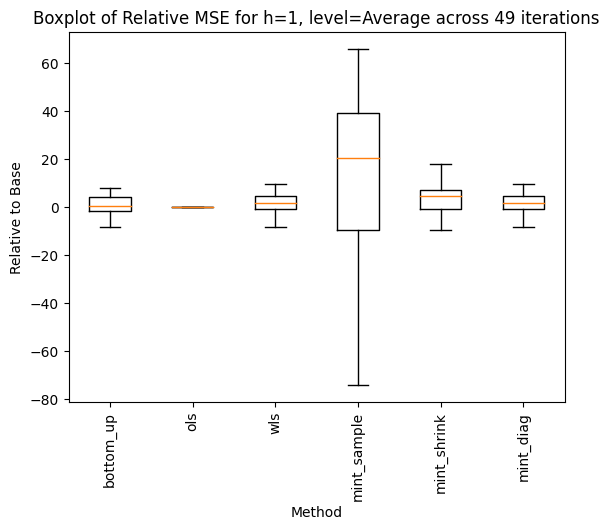

                min   max  mean  median     var
bottom_up     -8.46  7.89  1.02    0.59   13.78
ols            0.00  0.39  0.09    0.04    0.01
wls           -8.42  9.66  1.64    1.66   18.39
mint_sample -202.55 66.05  5.98   20.33 2677.82
mint_shrink  -15.86 17.95  3.26    4.55   40.93
mint_diag     -8.42  9.66  1.64    1.66   18.39


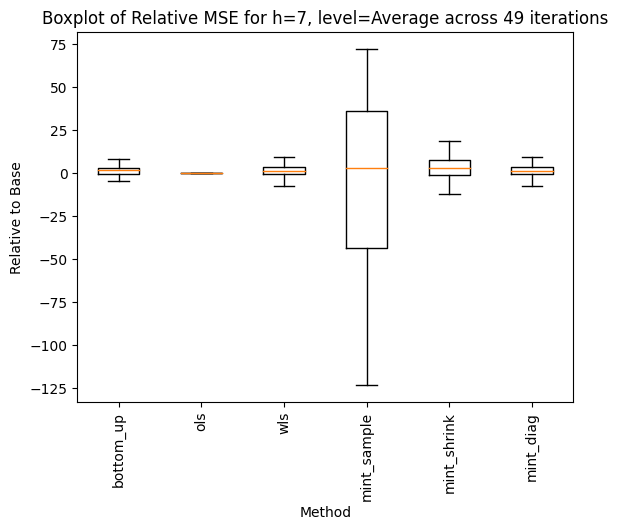

                min   max   mean  median     var
bottom_up     -4.88 11.18   1.70    1.66   14.85
ols            0.00  0.74   0.11    0.07    0.02
wls           -8.09 12.74   1.64    0.94   24.06
mint_sample -274.49 72.13 -16.16    2.66 5487.86
mint_shrink  -16.35 25.86   2.82    3.07   68.00
mint_diag     -8.09 12.74   1.64    0.94   24.06


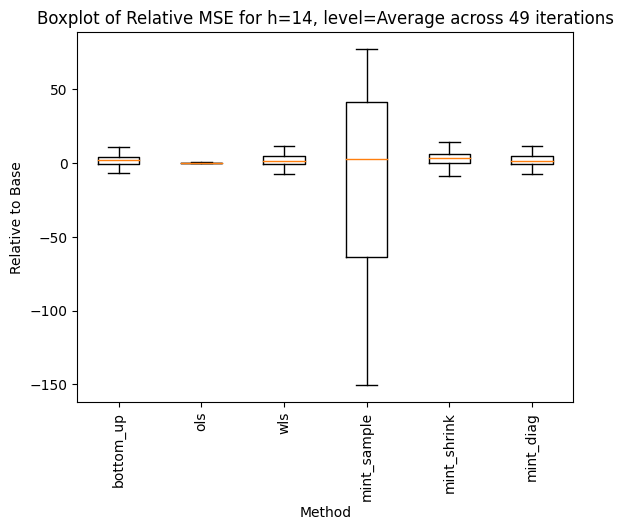

                min   max   mean  median     var
bottom_up     -6.62 11.66   1.88    1.81   17.34
ols            0.00  0.62   0.13    0.08    0.02
wls           -9.15 12.57   1.87    1.22   27.50
mint_sample -434.22 77.23 -19.93    2.75 8271.89
mint_shrink  -22.92 22.22   2.88    3.11   74.93
mint_diag     -9.15 12.57   1.87    1.22   27.50


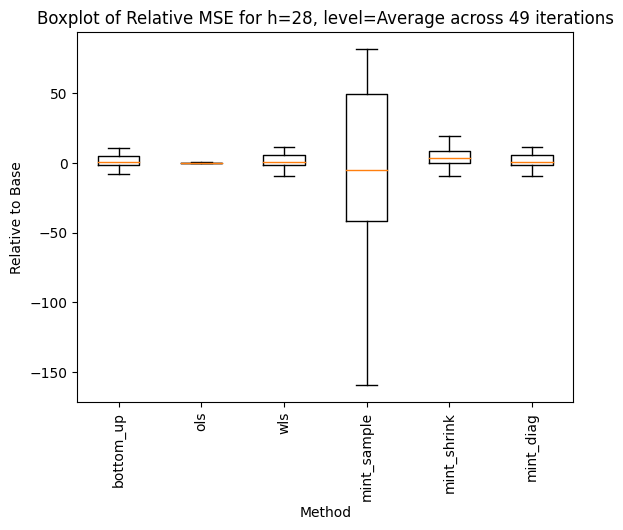

                min   max   mean  median     var
bottom_up     -7.93 10.57   1.50    0.92   21.20
ols            0.00  0.84   0.16    0.11    0.03
wls           -9.44 11.37   1.61    1.00   27.04
mint_sample -267.22 81.99 -16.14   -5.32 6556.83
mint_shrink  -18.77 19.56   3.14    3.24   75.34
mint_diag     -9.44 11.37   1.61    1.00   27.04


In [42]:
dOutputs=dOutputs_default
# dOutputs=dOutputs_tuned
relative='Base'
level='Average'
iters=int(dOutputs['bottom_up']['mYhat'].shape[1]/28)
metric="MSE"

lMethods=list(dOutputs.keys())
# lMethods.remove('top_down_ph')
# lMethods.remove('top_down_hp')


### Here we should calculate the loss for each iteration , then plot the loss


plt.figure()
for h in [1,7,14,28]:
    data = []  # To store values for each method
    labels = []  # To store method names as labels
    
    for method in lMethods:
        vValues = np.zeros(iters)
        
        for iter in range(1, iters+1):
            df = getCVResults(h=h, dOutputs=dOutputs,  metric=metric, 
                              slices=slices, 
                              iters=iter, 
                              rolling=False, relative=True)[method]
            vValues[iter-1] = df[df.index == level][relative].item()
        
        # Collect all values for the boxplot
        data.append(vValues)
        labels.append(method)
        
        

    # Create a boxplot for the current `h` step-ahead forecast
    plt.boxplot(data, labels=labels,showfliers=False)
    
    plt.xlabel("Method")
    plt.ylabel(f"Relative to {relative}")
    plt.xticks(rotation=90)
    plt.title(f"Boxplot of Relative {metric} for h={h}, level={level} across {iters} iterations")

    # Show the plot
    plt.show()
    
    #print stats
    mData=np.vstack((np.min(data,axis=1),                 
                np.max(data,axis=1),
                np.mean(data,axis=1),
                np.median(data,axis=1),
                np.var(data,axis=1)
                ))
    dfStats=pd.DataFrame(data=mData.T, columns=['min', 'max', 'mean','median','var'], 
                         index=lMethods
                     )
    print(dfStats)

    



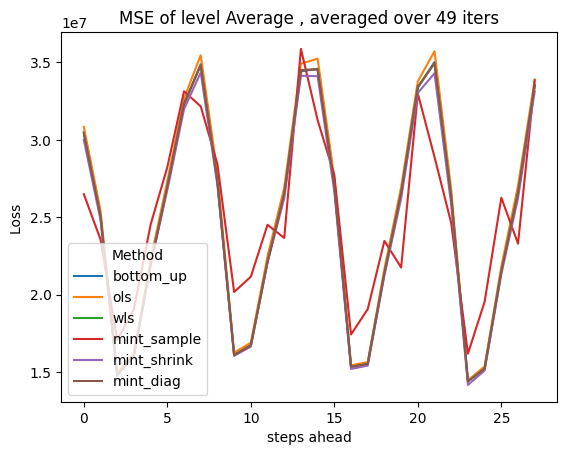

In [43]:
dOutputs=dOutputs_default

level='Average'
iters=int(dOutputs['bottom_up']['mYhat'].shape[1]/28)
metric='MSE'

lMethods=list(dOutputs.keys())
# lMethods.remove('top_down_ph')
# lMethods.remove('top_down_hp')

plt.figure()
for method in lMethods:
    vValues = np.zeros(28)
    
    for h in range(1, 29):
        df = getCVResults(h=h, dOutputs=dOutputs , metric=metric, slices=slices, 
                          iters=None, 
                          rolling=False, relative=False)[method]
        vValues[h-1] = df[df.index == level].item() 
            
    plt.plot(np.arange(28), vValues, label=method)

plt.legend(title="Method")
plt.xlabel("steps ahead")
plt.ylabel(f"Loss ")
plt.title(f"{metric} of level {level} , averaged over {iters} iters")


# Show the plot
plt.show()

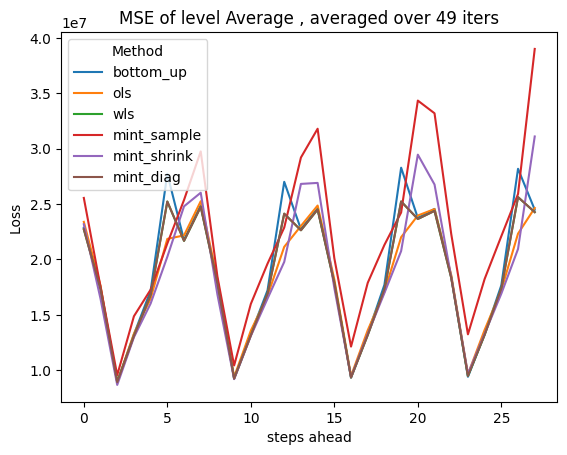

In [6]:
dOutputs=dOutputs_tuned

level='Average'
iters=int(dOutputs['bottom_up']['mYhat'].shape[1]/28)
metric='MSE'

lMethods=list(dOutputs.keys())
# lMethods.remove('top_down_ph')
# lMethods.remove('top_down_hp')

plt.figure()
for method in lMethods:
    vValues = np.zeros(28)
    
    for h in range(1, 29):
        df = getCVResults(h=h, dOutputs=dOutputs ,metric=metric, slices=slices, 
                          iters=None, 
                          rolling=False, relative=False)[method]
        vValues[h-1] = df[df.index == level].item()    
    plt.plot(np.arange(28), vValues, label=method)

plt.legend(title="Method")
plt.xlabel("steps ahead")
plt.ylabel(f"Loss ")
plt.title(f"{metric} of level {level} , averaged over {iters} iters")

# Show the plot
plt.show()




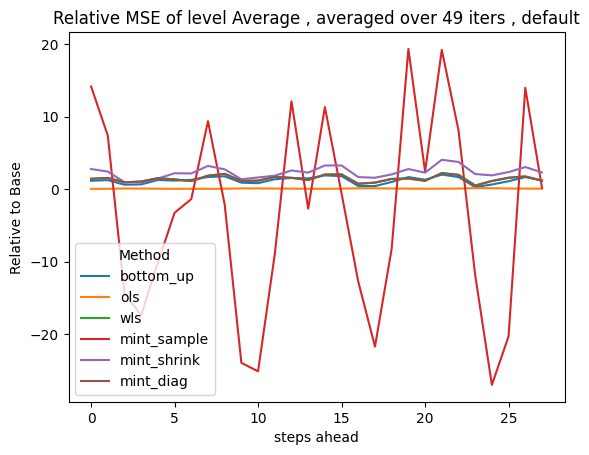

In [7]:
dOutputs=dOutputs_default

relative='Base'
level='Average'
iters=int(dOutputs_default['bottom_up']['mYhat'].shape[1]/28)
metric='MSE'

lMethods=list(dOutputs.keys())
# lMethods.remove('top_down_ph')
# lMethods.remove('top_down_hp')
# lMethods.remove('mint_full')

plt.figure()
for method in lMethods:
    vValues = np.zeros(28)
    
    for h in range(1, 29):
        df = getCVResults(h=h, dOutputs=dOutputs ,metric=metric, slices=slices, 
                          iters=None, 
                          rolling=False)[method]
        vValues[h-1] = df[df.index == level][relative].item()    
    plt.plot(np.arange(28), vValues, label=method)

plt.legend(title="Method")
plt.xlabel("steps ahead")
plt.ylabel(f"Relative to {relative}")
plt.title(f"Relative {metric} of level {level} , averaged over {iters} iters , default")

# Show the plot
plt.show()




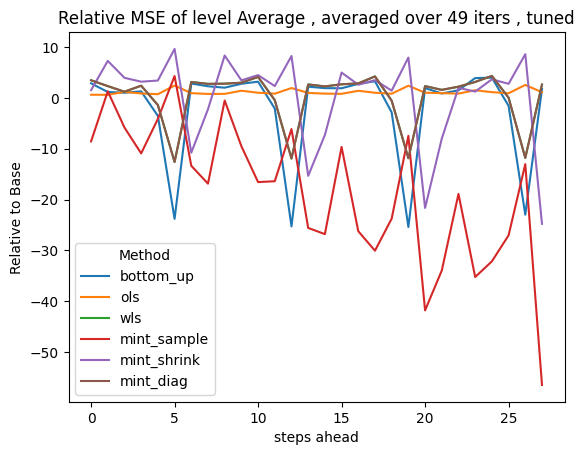

In [8]:
dOutputs=dOutputs_tuned

relative='Base'
level='Average'
iters=int(dOutputs_default['bottom_up']['mYhat'].shape[1]/28)
metric='MSE'

lMethods=list(dOutputs.keys())
# lMethods.remove('top_down_ph')
# lMethods.remove('top_down_hp')
# lMethods.remove('mint_full')

plt.figure()
for method in lMethods:
    vValues = np.zeros(28)
    
    for h in range(1, 29):
        df = getCVResults(h=h, dOutputs=dOutputs ,metric=metric, slices=slices, 
                          iters=None, 
                          rolling=False)[method]
        vValues[h-1] = df[df.index == level][relative].item()    
    plt.plot(np.arange(28), vValues, label=method)

plt.legend(title="Method")
plt.xlabel("steps ahead")
plt.ylabel(f"Relative to {relative}")
plt.title(f"Relative {metric} of level {level} , averaged over {iters} iters , tuned")

# Show the plot
plt.show()

# Tables


### MSE default

In [11]:
metric='MSE'
# dOutputs=dOutputs_tuned
dOutputs=dOutputs_default


In [12]:
getCVResults( h=1, dOutputs=dOutputs , metric=metric , slices=slices , rolling=True, iters=None)


Method   bottom_up        ols         wls      mint_sample       mint_shrink  \
Relative      Base   BU  Base    BU  Base   BU        Base    BU        Base   
Total         1.57 0.00  0.24 -1.35  1.76 0.19       15.51 14.17        3.00   
State         2.46 0.00  0.80 -1.70  2.72 0.27       16.26 14.14        3.76   
Store        -1.97 0.00 -2.19 -0.22 -1.41 0.55        9.36 11.11        0.34   
Cat.         -0.66 0.00 -0.52  0.14 -0.14 0.51        8.49  9.09        1.74   
Dept.         0.00 0.00  0.00  0.00  0.36 0.36        9.13  9.13        2.49   
Average       1.15 0.00  0.04 -1.12  1.43 0.29       14.14 13.15        2.77   

Method        mint_diag       
Relative   BU      Base   BU  
Total    1.45      1.76 0.19  
State    1.33      2.72 0.27  
Store    2.26     -1.41 0.55  
Cat.     2.39     -0.14 0.51  
Dept.    2.49      0.36 0.36  
Average  1.64      1.43 0.29

In [93]:
getCVResults( h=7, dOutputs=dOutputs , metric=metric , slices=slices , rolling=True, iters=None)

Method   bottom_up        ols         wls      mint_sample       mint_shrink  \
Relative      Base   BU  Base    BU  Base   BU        Base    BU        Base   
Total         1.73 0.00  0.46 -1.30  1.89 0.16       -2.24 -4.04        1.89   
State         1.37 0.00  0.05 -1.34  1.51 0.14       -0.50 -1.90        1.51   
Store        -0.96 0.00 -1.90 -0.93 -0.46 0.49        8.16  9.03       -0.46   
Cat.         -0.44 0.00 -1.77 -1.32 -0.20 0.24        5.27  5.68       -0.20   
Dept.         0.00 0.00 -0.67 -0.67  0.13 0.13        5.28  5.28        0.13   
Average      -0.14 0.00 -1.01 -0.86  0.04 0.19        5.36  5.50        0.04   

Method        mint_diag       
Relative   BU      Base   BU  
Total    0.16      1.89 0.16  
State    0.14      1.51 0.14  
Store    0.49     -0.46 0.49  
Cat.     0.24     -0.20 0.24  
Dept.    0.13      0.13 0.13  
Average  0.19      0.04 0.19

In [94]:
getCVResults( h=14, dOutputs=dOutputs , metric=metric , slices=slices , rolling=True, iters=None)

Method   bottom_up        ols         wls      mint_sample       mint_shrink  \
Relative      Base   BU  Base    BU  Base   BU        Base    BU        Base   
Total         2.02 0.00  0.52 -1.52  2.14 0.13       -3.38 -5.51        2.14   
State         1.51 0.00 -0.00 -1.53  1.63 0.12       -1.21 -2.76        1.63   
Store        -0.90 0.00 -2.01 -1.11 -0.41 0.49        8.93  9.74       -0.41   
Cat.         -0.44 0.00 -1.85 -1.40 -0.21 0.23        5.55  5.96       -0.21   
Dept.         0.00 0.00 -0.74 -0.74  0.12 0.12        5.09  5.09        0.12   
Average      -0.14 0.00 -1.08 -0.94  0.04 0.18        5.34  5.47        0.04   

Method        mint_diag       
Relative   BU      Base   BU  
Total    0.13      2.14 0.13  
State    0.12      1.63 0.12  
Store    0.49     -0.41 0.49  
Cat.     0.23     -0.21 0.23  
Dept.    0.12      0.12 0.12  
Average  0.18      0.04 0.18

In [95]:
getCVResults( h=21, dOutputs=dOutputs , metric=metric , slices=slices , rolling=True, iters=None, relative=True) 

Method   bottom_up        ols         wls      mint_sample       mint_shrink  \
Relative      Base   BU  Base    BU  Base   BU        Base    BU        Base   
Total         2.03 0.00  0.52 -1.55  2.14 0.11       -2.51 -4.63        2.14   
State         1.56 0.00  0.03 -1.56  1.67 0.11       -0.25 -1.84        1.67   
Store        -0.78 0.00 -2.02 -1.22 -0.32 0.46       10.37 11.07       -0.32   
Cat.         -0.40 0.00 -1.87 -1.46 -0.20 0.20        6.55  6.92       -0.20   
Dept.         0.00 0.00 -0.86 -0.86  0.11 0.11        5.30  5.30        0.11   
Average      -0.12 0.00 -1.17 -1.05  0.04 0.16        5.87  5.97        0.04   

Method        mint_diag       
Relative   BU      Base   BU  
Total    0.11      2.14 0.11  
State    0.11      1.67 0.11  
Store    0.46     -0.32 0.46  
Cat.     0.20     -0.20 0.20  
Dept.    0.11      0.11 0.11  
Average  0.16      0.04 0.16

In [96]:
getCVResults( h=28, dOutputs=dOutputs , metric=metric , slices=slices , rolling=True, iters=None, relative=True) 

Method   bottom_up        ols         wls      mint_sample       mint_shrink  \
Relative      Base   BU  Base    BU  Base   BU        Base    BU        Base   
Total         2.05 0.00  0.52 -1.55  2.18 0.14       -2.17 -4.30        2.18   
State         1.58 0.00  0.04 -1.56  1.70 0.13       -0.03 -1.63        1.70   
Store        -0.64 0.00 -1.98 -1.34 -0.19 0.44       10.67 11.23       -0.19   
Cat.         -0.41 0.00 -1.93 -1.52 -0.22 0.19        6.13  6.51       -0.22   
Dept.         0.00 0.00 -0.96 -0.96  0.10 0.10        4.49  4.49        0.10   
Average      -0.11 0.00 -1.24 -1.13  0.05 0.15        5.27  5.37        0.05   

Method        mint_diag       
Relative   BU      Base   BU  
Total    0.14      2.18 0.14  
State    0.13      1.70 0.13  
Store    0.44     -0.19 0.44  
Cat.     0.19     -0.22 0.19  
Dept.    0.10      0.10 0.10  
Average  0.15      0.05 0.15

### MAPE relative

In [1133]:
metric='MAPE'
dOutputs=dOutputs_default

In [1134]:
getCVResults( h=1, dOutputs=dOutputs , metric=metric , slices=slices , rolling=True, iters=None)



Method      BU      top_down_ph        top_down_hp          ols        diag  \
Relative  Base   BU        Base     BU        Base     BU  Base    BU  Base   
Total     0.58 0.00       -0.00  -0.58       -0.00  -0.58  0.09 -0.49  0.83   
State     0.56 0.00       -3.34  -3.92       -3.96  -4.55  0.38 -0.18  0.81   
Store    -0.73 0.00      -33.00 -32.03      -35.76 -34.77 -0.75 -0.01 -0.57   
Cat.      0.04 0.00      -40.69 -40.74      -44.40 -44.46 -0.73 -0.77  0.13   
Dept.     0.00 0.00      -16.72 -16.72      -18.60 -18.60  1.57  1.57  0.05   
Average  -0.02 0.00      -21.94 -21.91      -24.19 -24.16  0.99  1.01  0.04   

Method        full      mint_shrink       
Relative   BU Base   BU        Base   BU  
Total    0.25 8.21 7.67        2.15 1.58  
State    0.25 7.28 6.75        1.89 1.33  
Store    0.17 4.02 4.72        0.07 0.80  
Cat.     0.09 3.71 3.67        1.53 1.49  
Dept.    0.05 6.42 6.42        1.89 1.89  
Average  0.07 5.79 5.81        1.72 1.75

In [1135]:
getCVResults( h=7, dOutputs=dOutputs , metric=metric , slices=slices , rolling=True, iters=None)

Method      BU      top_down_ph        top_down_hp          ols        diag  \
Relative  Base   BU        Base     BU        Base     BU  Base    BU  Base   
Total     0.66 0.00        0.00  -0.66       -0.00  -0.66  0.10 -0.56  0.50   
State     1.21 0.00      -16.30 -17.72      -18.22 -19.67  0.23 -0.99  1.05   
Store    -0.03 0.00      -47.81 -47.77      -51.19 -51.15 -0.22 -0.19 -0.09   
Cat.      0.17 0.00      -54.78 -55.04      -58.39 -58.66  0.37  0.20  0.16   
Dept.     0.00 0.00      -30.92 -30.92      -33.29 -33.29  1.78  1.78 -0.01   
Average   0.06 0.00      -36.61 -36.69      -39.29 -39.37  1.33  1.28  0.04   

Method          full       mint_shrink       
Relative    BU  Base    BU        Base   BU  
Total    -0.16  0.03 -0.63        1.01 0.35  
State    -0.16 -0.33 -1.56        1.57 0.36  
Store    -0.06  0.11  0.14        0.63 0.66  
Cat.     -0.01  0.57  0.39        0.80 0.63  
Dept.    -0.01  1.56  1.56        1.72 1.72  
Average  -0.02  1.23  1.17        1.46 1.40

In [1136]:
getCVResults( h=14, dOutputs=dOutputs , metric=metric , slices=slices , rolling=True, iters=None)

Method      BU      top_down_ph        top_down_hp          ols        diag  \
Relative  Base   BU        Base     BU        Base     BU  Base    BU  Base   
Total     1.04 0.00        0.00  -1.05        0.00  -1.05  0.21 -0.84  0.93   
State     1.12 0.00      -15.68 -17.00      -17.58 -18.92  0.10 -1.04  0.95   
Store    -0.04 0.00      -46.10 -46.04      -49.46 -49.40 -0.42 -0.38 -0.12   
Cat.      0.22 0.00      -53.23 -53.56      -56.76 -57.10  0.15 -0.07  0.20   
Dept.     0.00 0.00      -29.31 -29.31      -31.63 -31.63  1.70  1.70 -0.00   
Average   0.07 0.00      -35.02 -35.11      -37.64 -37.73  1.22  1.15  0.05   

Method          full       mint_shrink       
Relative    BU  Base    BU        Base   BU  
Total    -0.11 -0.32 -1.38        1.15 0.11  
State    -0.17  0.76 -0.37        1.32 0.20  
Store    -0.08 -0.65 -0.61        0.46 0.50  
Cat.     -0.02  1.28  1.06        0.92 0.70  
Dept.    -0.00  1.77  1.77        1.79 1.79  
Average  -0.01  1.50  1.43        1.52 1.45

In [1137]:
getCVResults( h=28, dOutputs=dOutputs , metric=metric , slices=slices , rolling=True, iters=None) 

Method     BU      top_down_ph        top_down_hp          ols        diag  \
Relative Base   BU        Base     BU        Base     BU  Base    BU  Base   
Total    0.61 0.00        0.00  -0.62       -0.00  -0.62  0.07 -0.55  0.58   
State    0.90 0.00      -17.53 -18.60      -19.68 -20.78  0.29 -0.62  0.83   
Store    0.26 0.00      -46.86 -47.24      -50.26 -50.65 -0.20 -0.46  0.21   
Cat.     0.20 0.00      -51.48 -51.78      -54.93 -55.23 -0.04 -0.24  0.18   
Dept.    0.00 0.00      -26.79 -26.79      -29.10 -29.10  1.91  1.91 -0.02   
Average  0.07 0.00      -32.91 -33.01      -35.51 -35.61  1.35  1.27  0.05   

Method          full       mint_shrink       
Relative    BU  Base    BU        Base   BU  
Total    -0.03 -3.69 -4.33        0.93 0.32  
State    -0.08  0.66 -0.24        1.58 0.68  
Store    -0.06 -2.97 -3.24        0.57 0.31  
Cat.     -0.02 -0.12 -0.32        0.82 0.62  
Dept.    -0.02 -3.98 -3.98        1.59 1.59  
Average  -0.02 -3.04 -3.11        1.37 1.30

### MSE relative

In [1153]:
dOutputs=dOutputs_default
metric='RMSE'

In [1154]:
getCVResults( h=1, dOutputs=dOutputs , metric=metric , slices=slices , rolling=True, iters=None)



Method      BU      top_down_ph        top_down_hp          ols        diag  \
Relative  Base   BU        Base     BU        Base     BU  Base    BU  Base   
Total     0.79 0.00       -0.00  -0.79       -0.00  -0.79  0.12 -0.67  0.88   
State     1.24 0.00       -5.84  -7.17       -6.30  -7.63  0.40 -0.85  1.37   
Store    -0.98 0.00      -32.71 -31.43      -34.75 -33.45 -1.09 -0.11 -0.70   
Cat.     -0.33 0.00      -37.31 -36.87      -40.21 -39.75 -0.26  0.07 -0.07   
Dept.     0.00 0.00      -41.93 -41.93      -44.91 -44.91  0.00  0.00  0.18   
Average   0.58 0.00      -11.15 -11.79      -12.00 -12.65  0.02 -0.56  0.72   

Method        full      mint_shrink       
Relative   BU Base   BU        Base   BU  
Total    0.10 8.08 7.35        2.12 1.35  
State    0.13 8.51 7.37        2.46 1.24  
Store    0.27 6.70 7.61        0.97 1.93  
Cat.     0.26 6.85 7.16        1.70 2.02  
Dept.    0.18 7.72 7.72        2.15 2.15  
Average  0.14 7.92 7.39        2.05 1.48

In [1155]:
getCVResults( h=7, dOutputs=dOutputs , metric=metric , slices=slices , rolling=True, iters=None)

Method      BU      top_down_ph        top_down_hp          ols        diag  \
Relative  Base   BU        Base     BU        Base     BU  Base    BU  Base   
Total     0.92 0.00        0.00  -0.93       -0.00  -0.93  0.21 -0.71  0.79   
State     0.90 0.00      -15.38 -16.43      -16.89 -17.95 -0.02 -0.93  0.76   
Store    -0.57 0.00      -47.62 -46.79      -50.22 -49.37 -0.69 -0.12 -0.43   
Cat.      0.10 0.00      -49.79 -49.95      -53.01 -53.17 -0.03 -0.13  0.15   
Dept.     0.00 0.00      -56.73 -56.73      -59.99 -59.99 -0.09 -0.09 -0.02   
Average   0.64 0.00      -17.40 -18.16      -18.67 -19.43  0.02 -0.62  0.56   

Method         full      mint_shrink       
Relative    BU Base   BU        Base   BU  
Total    -0.13 1.23 0.32        1.61 0.70  
State    -0.14 2.58 1.70        1.52 0.63  
Store     0.13 3.64 4.18        1.36 1.91  
Cat.      0.05 3.79 3.69        2.00 1.90  
Dept.    -0.02 3.33 3.33        2.09 2.09  
Average  -0.09 2.13 1.49        1.61 0.98

In [1156]:

getCVResults( h=14, dOutputs=dOutputs , metric=metric , slices=slices , rolling=True, iters=None)

Method      BU      top_down_ph        top_down_hp          ols        diag  \
Relative  Base   BU        Base     BU        Base     BU  Base    BU  Base   
Total     1.09 0.00        0.00  -1.10        0.00  -1.10  0.25 -0.85  0.92   
State     0.90 0.00      -14.97 -16.01      -16.43 -17.49 -0.09 -0.99  0.72   
Store    -0.55 0.00      -44.67 -43.88      -47.14 -46.33 -0.70 -0.14 -0.44   
Cat.      0.29 0.00      -45.88 -46.32      -48.91 -49.35  0.05 -0.25  0.30   
Dept.     0.00 0.00      -52.87 -52.87      -55.96 -55.96 -0.15 -0.15 -0.06   
Average   0.74 0.00      -16.49 -17.36      -17.70 -18.58  0.03 -0.72  0.62   

Method         full       mint_shrink       
Relative    BU Base    BU        Base   BU  
Total    -0.17 0.82 -0.27        1.65 0.57  
State    -0.18 3.24  2.37        1.46 0.57  
Store     0.11 4.97  5.49        1.45 1.99  
Cat.      0.01 6.03  5.76        2.37 2.08  
Dept.    -0.06 3.82  3.82        2.18 2.18  
Average  -0.12 2.43  1.70        1.67 0.93

In [1157]:
getCVResults( h=28, dOutputs=dOutputs , metric=metric , slices=slices , rolling=True, iters=None) 

Method      BU      top_down_ph        top_down_hp          ols        diag  \
Relative  Base   BU        Base     BU        Base     BU  Base    BU  Base   
Total     0.76 0.00        0.00  -0.76        0.00  -0.76  0.18 -0.59  0.74   
State     1.05 0.00      -15.20 -16.42      -16.75 -17.99  0.10 -0.97  0.95   
Store    -0.41 0.00      -43.53 -42.94      -45.94 -45.34 -0.59 -0.18 -0.27   
Cat.      0.01 0.00      -45.13 -45.14      -48.09 -48.10 -0.11 -0.12  0.09   
Dept.     0.00 0.00      -50.83 -50.83      -53.84 -53.84 -0.08 -0.08  0.03   
Average   0.59 0.00      -16.79 -17.49      -18.03 -18.74  0.03 -0.57  0.59   

Method          full       mint_shrink       
Relative    BU  Base    BU        Base   BU  
Total    -0.02 -3.43 -4.22        1.43 0.68  
State    -0.10  1.04 -0.01        1.72 0.68  
Store     0.14  3.75  4.14        1.69 2.09  
Cat.      0.08  3.34  3.33        2.32 2.31  
Dept.     0.03 -3.37 -3.37        2.24 2.24  
Average  -0.01 -0.94 -1.54        1.65 1.06